# Taller 7
Métodos Computacionales para Políticas Públicas - URosario

**Entrega: viernes 11-oct-2019 11:59 PM**

<div class="alert alert-success">

**Juan Sebastián Muñoz** <br><br>

jsebastianmvargas@gmail.com
</div>

## Instrucciones:
- Guarde una copia de este *Jupyter Notebook* en su computador, idealmente en una carpeta destinada al material del curso.
- Modifique el nombre del archivo del *notebook*, agregando al final un guión inferior y su nombre y apellido, separados estos últimos por otro guión inferior. Por ejemplo, mi *notebook* se llamaría: mcpp_taller7_santiago_matallana
- Marque el *notebook* con su nombre y e-mail en el bloque verde arriba. Reemplace el texto "[Su nombre acá]" con su nombre y apellido. Similar para su e-mail.
- Desarrolle la totalidad del taller sobre este *notebook*, insertando las celdas que sea necesario debajo de cada pregunta. Haga buen uso de las celdas para código y de las celdas tipo *markdown* según el caso.
- Recuerde salvar periódicamente sus avances.
- Cuando termine el taller:
    1. Descárguelo en PDF. Si tiene algún problema con la conversión, descárguelo en HTML.
    2. Suba todos los archivos a su repositorio en GitHub, en una carpeta destinada exclusivamente para este taller, antes de la fecha y hora límites.

(Todos los ejercicios tienen el mismo valor.)

---

Este taller tiene dos partes. Una obligatoria, relativamente fácil, y otra voluntaria y más retadora. Los invito a intentar desarrollar el taller en su totalidad.

En este taller exploraremos los datos de crimen de Chicago. 

Descargue los datos de crimen del Chicago Data Portal solo para el año 2015 (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data).

### Parte obligatoria

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [28.0, 20.0]
plt.style.use('ggplot')

### 1.
Calcule el número de crímenes en cada Community Area en 2015. Haga un gráfico de barras que lo ilustre.

In [213]:
crimes = pd.read_csv('Crimes_-_2001_to_present.csv', parse_dates=['Date'])

In [194]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day
0,10201852,HY389096,2015-01-01,008XX N MAPLEWOOD AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,24,26,1159250.0,1905420.0,2015,08/20/2015 04:17:37 PM,41.896198,-87.690553,"(41.896197984, -87.690552821)",2015-01-01
1,10060114,HY239140,2015-01-01,069XX S CORNELL AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,43,20,1188551.0,1859284.0,2015,08/17/2015 03:03:40 PM,41.768946,-87.584415,"(41.768945532, -87.584414851)",2015-01-01
2,10210454,HY397301,2015-01-01,049XX W WABANSIA AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,25,02,NaN,NaN,2015,08/31/2015 03:43:09 PM,NaN,NaN,NaN,2015-01-01
3,10025440,HY214766,2015-01-01,004XX E 80TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,True,...,44,11,1180776.0,1852066.0,2015,08/17/2015 03:03:40 PM,41.749321,-87.613135,"(41.749320815, -87.613135423)",2015-01-01
4,10225520,HY412735,2015-01-01,075XX S BLACKSTONE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,43,11,NaN,NaN,2015,09/10/2015 11:43:14 AM,NaN,NaN,NaN,2015-01-01


In [214]:
#Agrupación de los casos por Area comunitaria
crimes_by_community = crimes.groupby("Community Area")

In [215]:
#Conteo de los crimenes por Area comunitaria
community_crime_count = crimes_by_community['ID'].agg('count')
community_crime_count.head()

Community Area
1    3519
2    3059
3    3585
4    1747
5    1375
Name: ID, dtype: int64

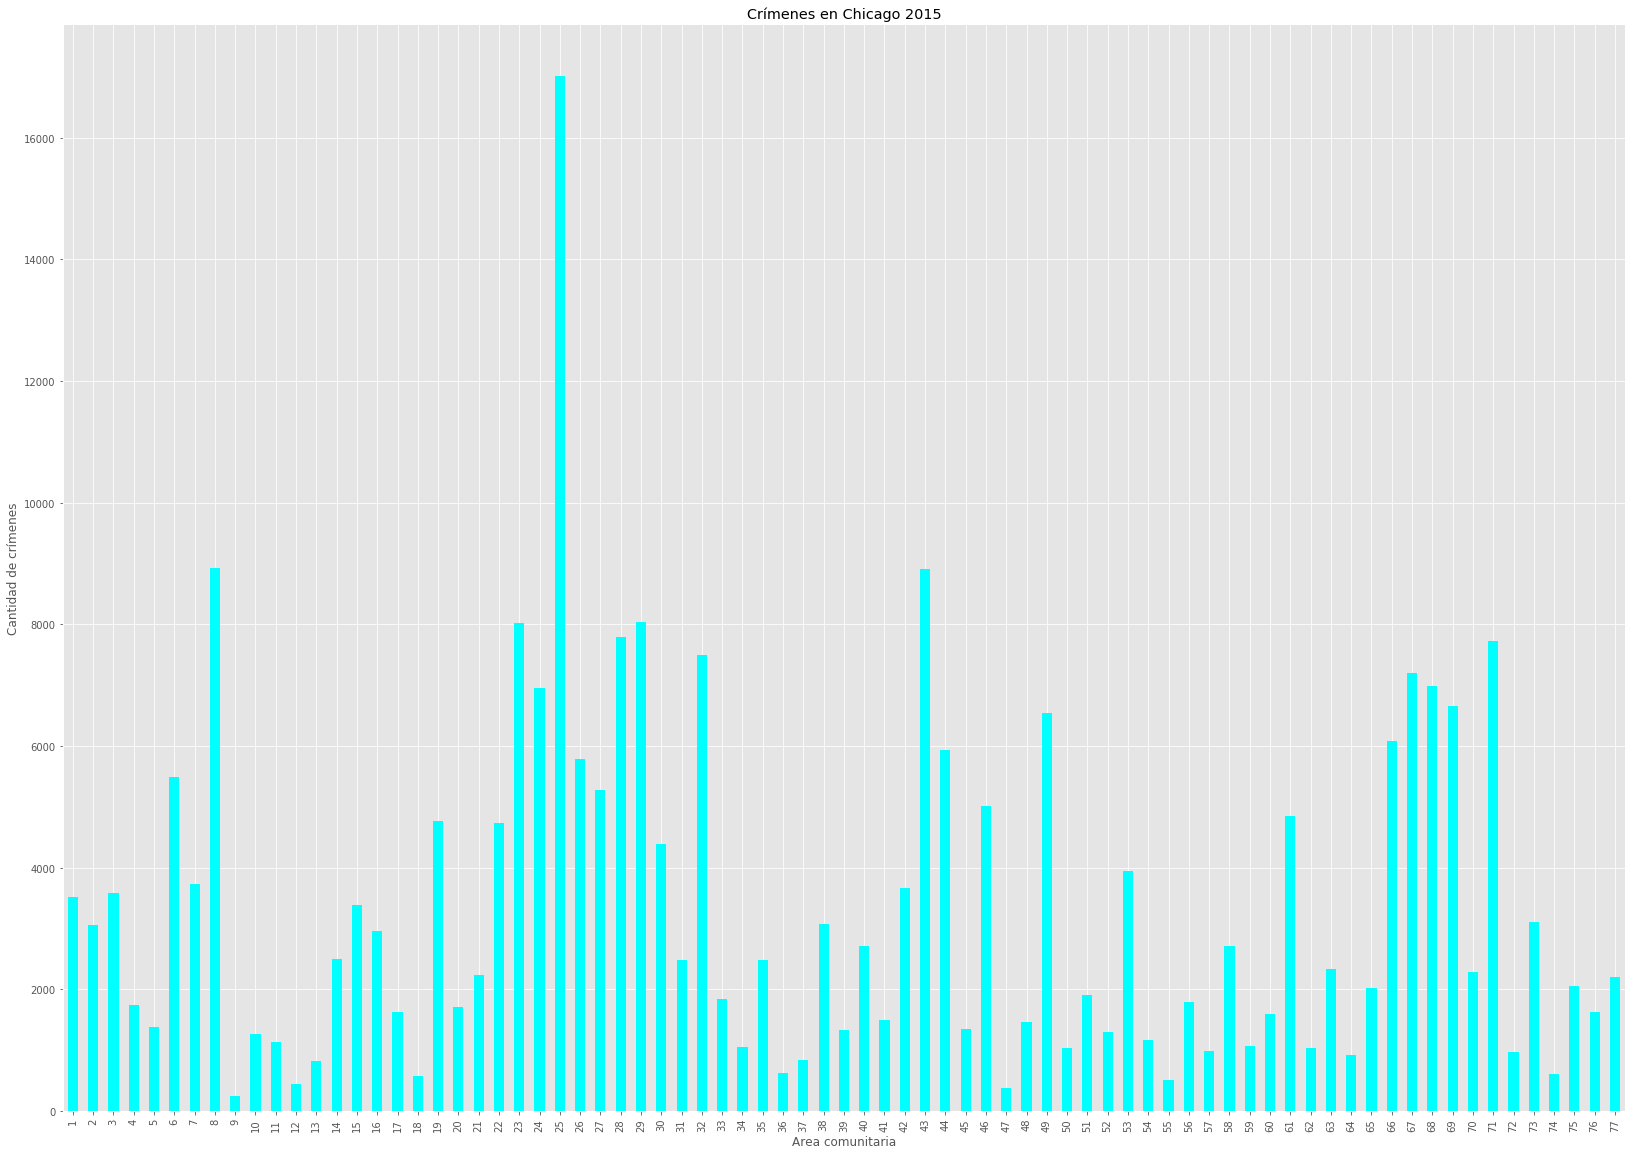

In [20]:
#Grafico de los crímenes por area comunitaria en 2015
community_crime_count.plot(kind='bar', color ="cyan")
plt.title("Crímenes en Chicago 2015")
plt.xlabel("Area comunitaria")
plt.ylabel("Cantidad de crímenes");

---

### 2.
Ordene las Community Areas de acuerdo con el número de crímenes. ¿Qué Community Area (por nombre, idealmente) presenta el mayor número de crímenes? ¿El menor?

In [250]:
#El proceso de creación de crimes_socioeconomic se detalla en el punto opcional.
#Dado que luego de poder hacerlo encontré la lista de nombres de las Community Area.
crimes_socioeconomic.iloc[:,0:3].head()

,Community_Area,Crimes,COMMUNITY AREA NAME
0,1,3519,Rogers Park
1,2,3059,West Ridge
2,3,3585,Uptown
3,4,1747,Lincoln Square
4,5,1375,North Center


In [251]:
crimes_community_name = crimes_socioeconomic.iloc[:,0:3]

In [253]:
type(crimes_community_name)

pandas.core.frame.DataFrame

In [254]:
crimes_community_name.sort_values(by = 'Crimes', ascending=True).head(5)

,Community_Area,Crimes,COMMUNITY AREA NAME
8,9,254,Edison Park
46,47,380,Burnside
11,12,444,Forest Glen
54,55,506,Hegewisch
17,18,572,Montclaire


##### 'Edison Park' es la Community Area con menos crímenes en Chicago para 2015

In [255]:
crimes_community_name.sort_values(by = 'Crimes', ascending=False).head(5)

,Community_Area,Crimes,COMMUNITY AREA NAME
24,25,17020,Austin
7,8,8920,Near North Side
42,43,8906,South Shore
28,29,8039,North Lawndale
22,23,8015,Humboldt park


##### 'Austin' es la Community Area con más crímenes en Chicago para 2015

---

### 3.
Cree una tabla cuyas filas sean días del año (yyyy-mm-dd) y las columnas las 77 Community Areas. En cada campo de la tabla deberá haber el correspondiente número de crímenes. Seleccione algunas Community Areas que le llamen la atención y haga un gráfico de serie de tiempo.

Pista: El siguiente código puede serle útil.

In [31]:
# Create function to strip time from date field, and use it to create another column
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

crimes['Day'] = crimes['Date'].apply(to_day)

In [196]:
#Tabla de crímenes por Community Area cada día del año
crimes_by_community_day = crimes.groupby(['Community Area', 'Day'])
crimes_by_community_day_count = crimes_by_community_day['ID'].agg('count')
crimes_community_day_timeseries = crimes_by_community_day_count.unstack('Community Area')
crimes_community_day_timeseries.head()

Community Area,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,13.0,7.0,11.0,4.0,5.0,22.0,12.0,43.0,1.0,5.0,...,29.0,23.0,9.0,44.0,2.0,8.0,2.0,5.0,6.0,8.0
2015-01-02,5.0,9.0,8.0,3.0,2.0,10.0,9.0,27.0,NaN,2.0,...,12.0,21.0,5.0,17.0,1.0,11.0,1.0,2.0,6.0,5.0
2015-01-03,7.0,11.0,9.0,7.0,4.0,6.0,11.0,27.0,1.0,3.0,...,23.0,12.0,8.0,18.0,NaN,8.0,1.0,7.0,3.0,3.0
2015-01-04,12.0,7.0,9.0,10.0,3.0,15.0,5.0,16.0,1.0,4.0,...,13.0,15.0,9.0,12.0,1.0,5.0,NaN,1.0,6.0,1.0
2015-01-05,6.0,7.0,5.0,4.0,5.0,15.0,7.0,11.0,1.0,3.0,...,16.0,12.0,8.0,17.0,NaN,5.0,2.0,2.0,7.0,5.0


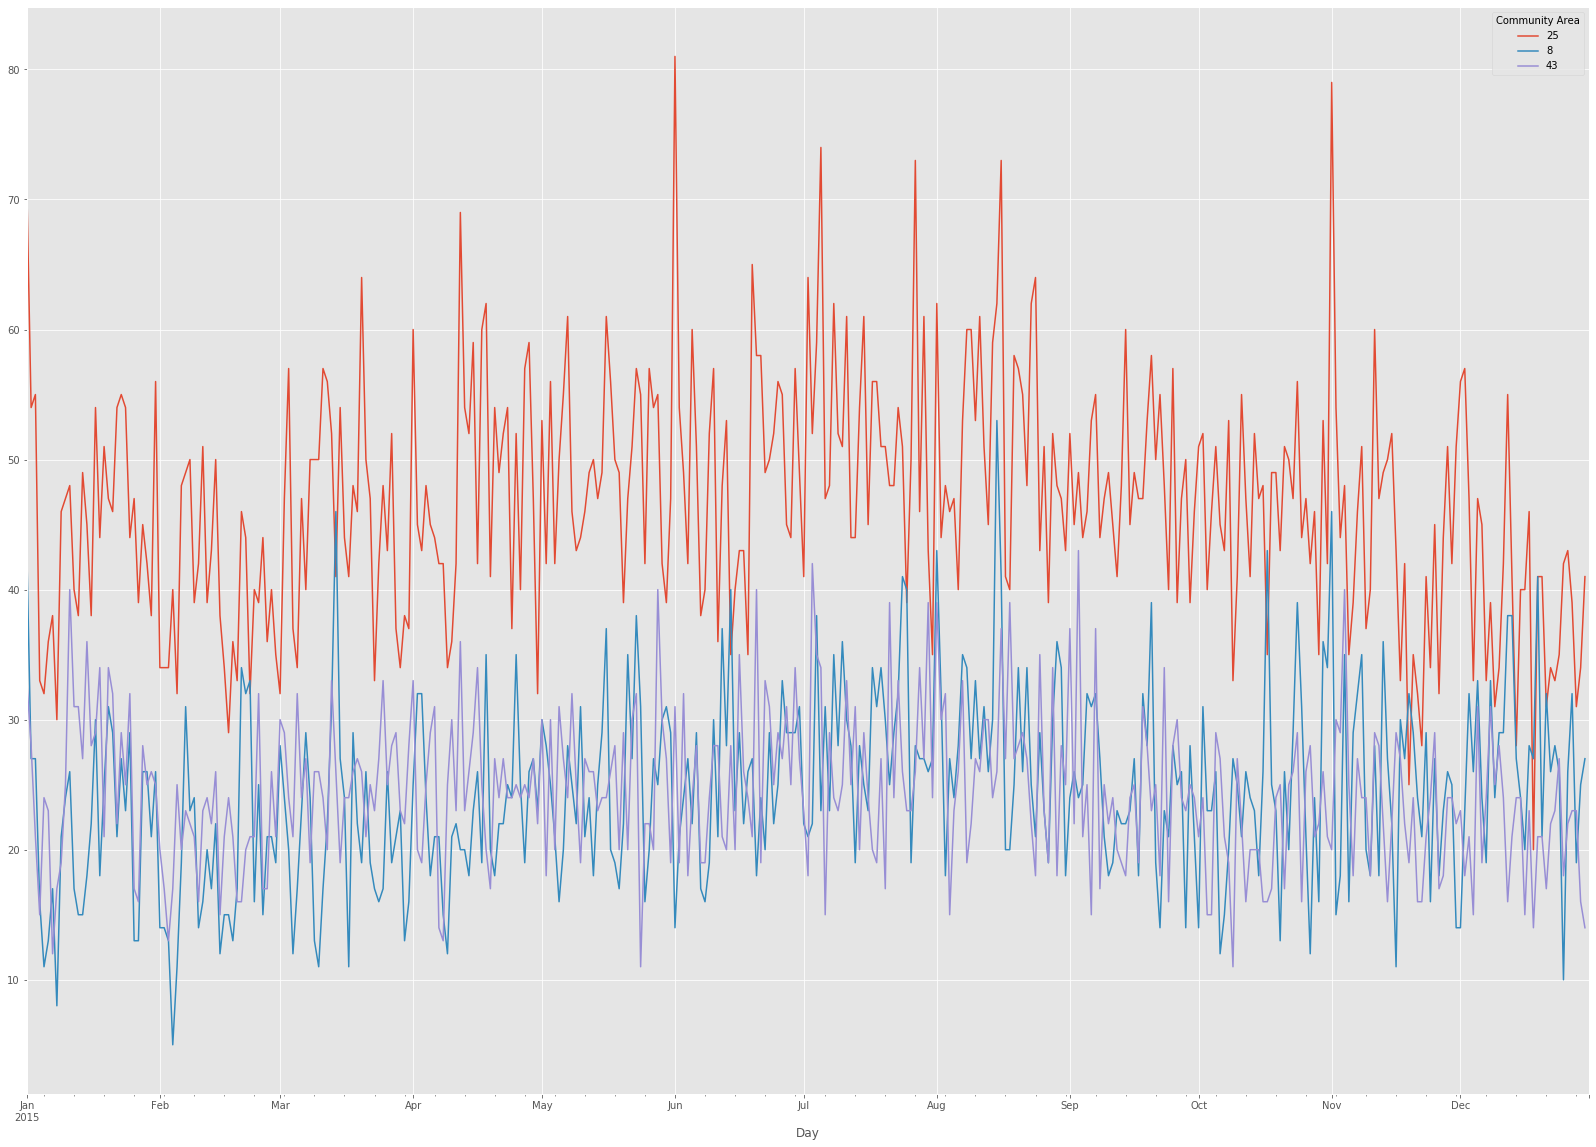

In [45]:
#Serie de tiempo de las tres Community areas con más crímenes en todo 2015
crimes_community_day_timeseries[[25, 8, 43]].plot();

---

### Parte voluntaria

Descargue la base de datos de información socioeconómica (https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).

### 4.
Cree una tabla que agregue el número de crímenes por Community Area. Una esa tabla con la de datos socioeconómicos y cree un "scatter plot" de número de crímenes vs ingreso per cápita. Explique la relación en palabras.

In [216]:
community_crime_count = community_crime_count.to_frame()

In [217]:
community_crime_count = community_crime_count.reset_index(level=['Community Area'])

In [218]:
socio_economic = pd.read_csv("Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")

In [207]:
socio_economic.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [219]:
socio_economic = socio_economic.drop(77)

In [220]:
socio_economic.insert(0, 'Community_Area', socio_economic['Community Area Number'].astype(int))
socio_economic = socio_economic.drop(columns="Community Area Number")
socio_economic.head()

,Community_Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [221]:
community_crime_count.columns = ["Community_Area","Crimes"]
socio_economic.columns = ['Community_Area', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'Per_Capita_Income',
       'HARDSHIP INDEX']

In [222]:
crimes_socioeconomic = pd.merge(community_crime_count, socio_economic, on='Community_Area', how='inner')

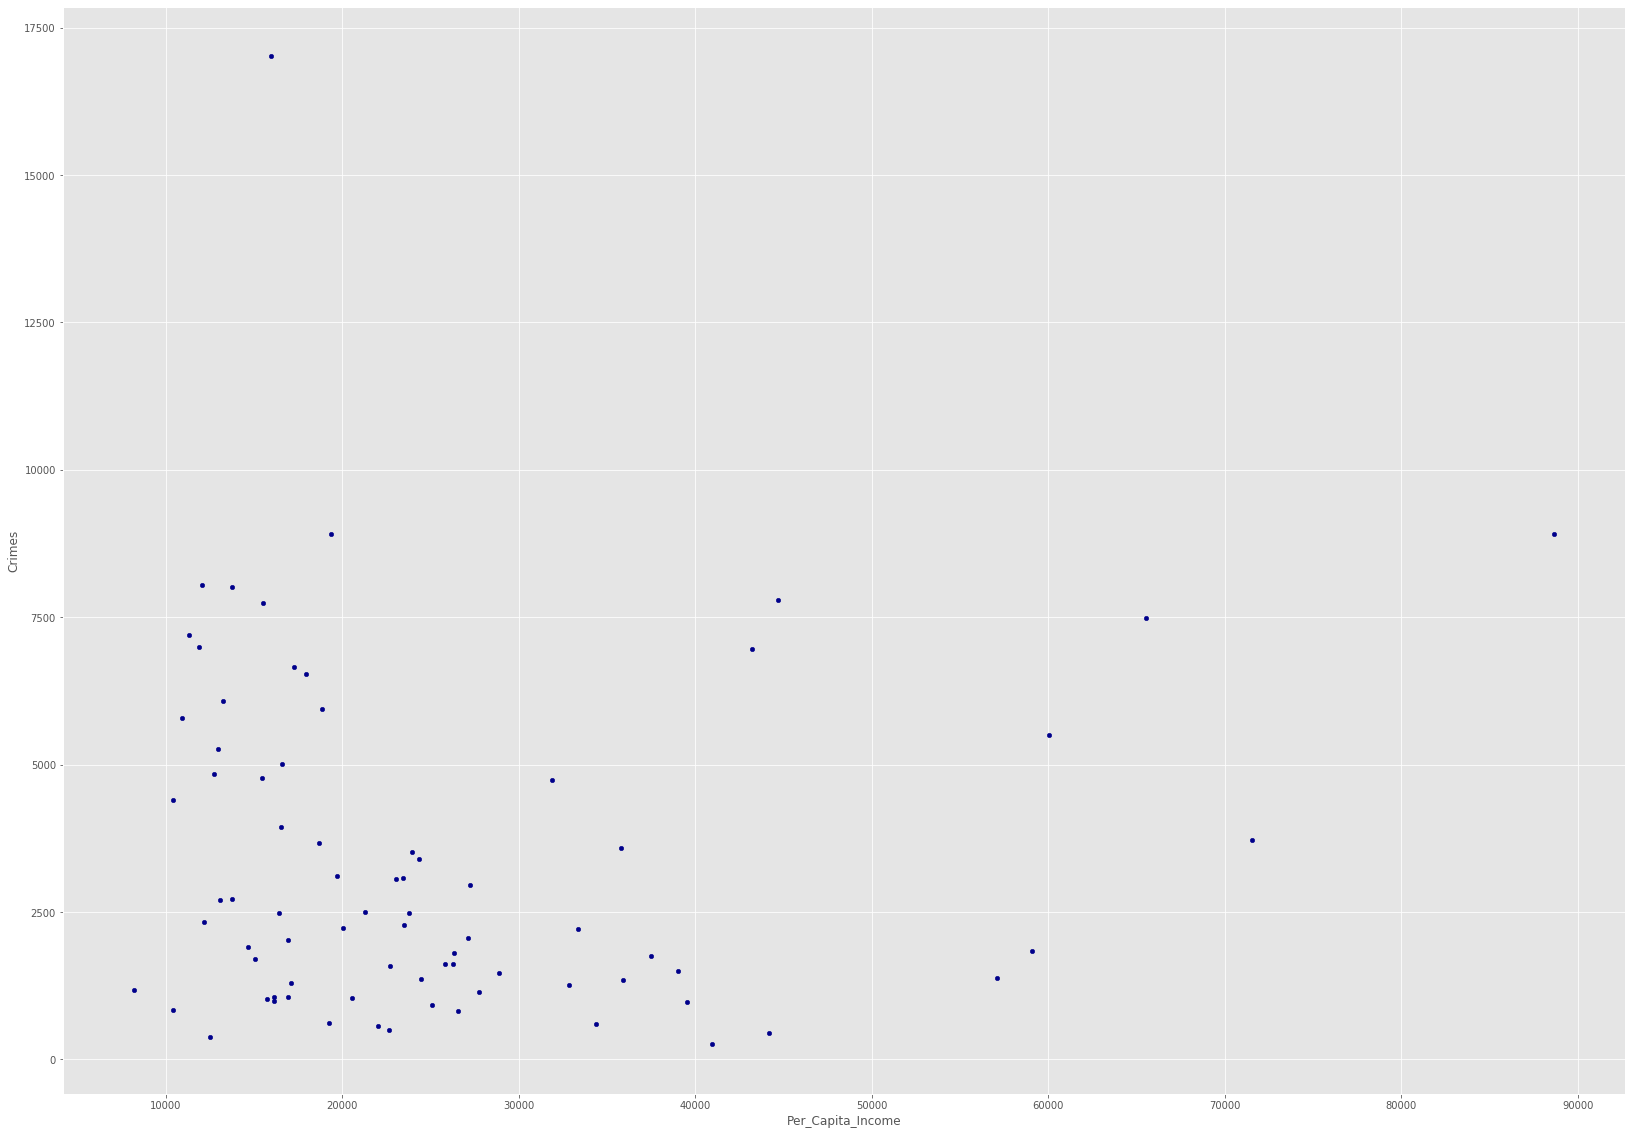

In [240]:
## Gráfico de dispersión de crímenes por ingresos per cápita.
Scatter_plot = crimes_socioeconomic.plot.scatter(x='Per_Capita_Income', y='Crimes', c='DarkBlue')

La presencia del crímen se presenta con mayor ocurrencia en las Commuunity Areas con menor ingreso per cápita. Por lo que entre más alto es el ingreso per cápita, se disminuyen la cantidad de crímenes en esa Community Area. Además, se logra detallar la alta concentración de Community Areas con Ingresos per cápita muy bajos, mostrand a su vez, la desigualdad de ingresos en la ciudad.

----